In [1]:
from transformers import Sam3TrackerProcessor, Sam3TrackerModel
# from transformers import Sam3Model, Sam3Processor
from accelerate import Accelerator
import torch
import matplotlib.pyplot as plt
from PIL import Image
import requests
from huggingface_hub import login
import os, dotenv

c:\Users\maxim\miniforge3\envs\roadgen_proj\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dotenv.load_dotenv()
login(token=os.environ.get("HF_TOKEN"))

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [5]:
device = Accelerator().device

model = Sam3TrackerModel.from_pretrained("facebook/sam3").to(device)
processor = Sam3TrackerProcessor.from_pretrained("facebook/sam3")

image_url = "https://huggingface.co/datasets/hf-internal-testing/sam2-fixtures/resolve/main/truck.jpg"

raw_image = Image.open(requests.get(image_url, stream=True).raw).convert("RGB")

input_points =[[[[500, 375]]]]

input_labels =[[[1]]]

inputs = processor(raw_image, input_points=input_points, input_labels=input_labels, return_tensors="pt").to(model.device)

with torch.no_grad():

    outputs = model(**inputs)

masks = processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"])[0]
# The model outputs multiple mask predictions ranked by quality score

print(f"Generated {masks.shape[1]} masks with shape {masks.shape}")

You are using a model of type sam3_video to instantiate a model of type sam3_tracker. This is not supported for all configurations of models and can yield errors.
Loading weights: 100%|██████████| 685/685 [00:01<00:00, 524.50it/s, Materializing param=vision_encoder.neck.fpn_layers.3.proj2.weight]                            


Generated 3 masks with shape torch.Size([1, 3, 1200, 1800])


In [6]:
masks.shape

torch.Size([1, 3, 1200, 1800])

In [4]:
device

device(type='cpu')

In [23]:
import numpy as np
np.asarray(raw_image).shape

(1200, 1800, 3)

In [8]:
a = masks[-1][0]
b = masks[-1][1]
c = masks[-1][2]

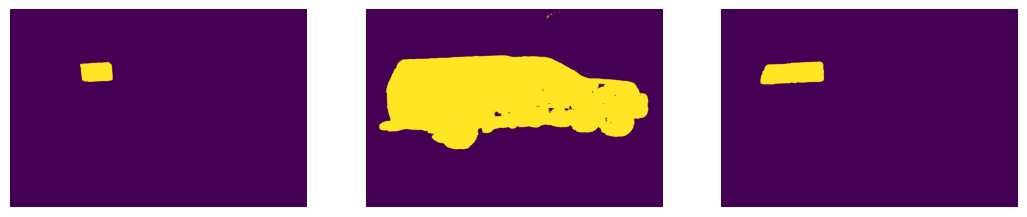

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(13, 5))
[ax.axis('off') for ax in axs]

axs[0].imshow(a)
axs[1].imshow(b)
axs[2].imshow(c)
plt.show()

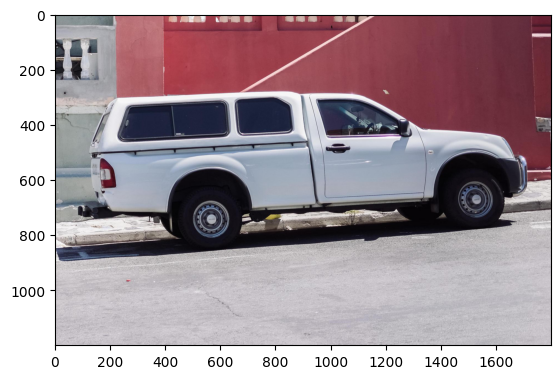

In [28]:
plt.imshow(raw_image)

In [28]:
from transformers import Sam3Processor, Sam3TrackerModel

device = Accelerator().device

model = Sam3TrackerModel.from_pretrained("facebook/sam3").to(device)
processor = Sam3Processor.from_pretrained("facebook/sam3")

You are using a model of type sam3_video to instantiate a model of type sam3_tracker. This is not supported for all configurations of models and can yield errors.
Loading weights: 100%|██████████| 685/685 [00:01<00:00, 574.67it/s, Materializing param=vision_encoder.neck.fpn_layers.3.proj2.weight]                            


In [32]:
example_image_path = "../data/examples/images/10078660_15_patch_001_x256_y0.png"

image = Image.open(example_image_path).convert('RGB')

inputs = processor(image, input_text=["building"], return_tensors="pt").to(device)

with torch.no_grad():
    outputs = model(**inputs)

masks = processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"])[0]

Unused or unrecognized kwargs: input_text.


TypeError: Sam3FastImageProcessorKwargs.__init__() got an unexpected keyword argument 'input_text'